<a href="https://colab.research.google.com/github/debi92/Equalee/blob/main/Tuition_Fee_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tuition Fee Prediction based on Student's Family's Socio-Economic Factors

Education is still a major problem in Indonesia. One of the main reason is the unequality of educational facility and socio economic factors that caused someone to dropout from school. This project is to give prediction on which category of tuition fee that every student need to pay based on their family's socio-economic factors, such as: income, electricity bill, water bill, internet bill, house ownership, house size, number of dependents in the family so it will give an equality in the payment of education fees, where people with better economies will help paying for the poorer education. 
Manually analyzing these factors is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning. In this notebook, we will build an automatic tuition fee predictor using machine learning techniques.

The dataset we used was made by ourselves by gaining data from parents in Java (mostly Jakarta and West Java). We asked them their socio economic background and the tuition fee their paying monthly. 
The structure of this notebook is as follows:

First, we will start off by loading and viewing the dataset.

1.   First, we will start by importing the library that needed in this project
2.   Then we will load and view the dataset. 
3.   We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges.
4.   We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.
5.   After our data is in good shape, we will do some exploratory data analysis to build our intuitions.
6.   Finally, we will build a machine learning model that can predict the tuition fee's category. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
from pylab import rcParams

import scipy
from scipy.stats import spearmanr

import seaborn as sb

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [2]:
tfp = pd.read_csv('/content/Dataset Sosial Ekonomi dan Uang Sekolah.csv')
tfp.head()

,Nama,Domisili,Pekerjaan,Tingkat,Nama sekolah,Jenis sekolah,Biaya sekolah,Kepemilikan rumah,Jenis bangunan,Ukuran rumah,Listrik,Air,Internet,Penghasilan,Jumlah tanggungan
0,HN,Jakarta,IRT,SD,Chandra Kusuma,Swasta,Rp 500.001 - Rp 1.000.000,Milik sendiri/ keluarga,Rumah,< 36 m2,Rp. 500.001 – Rp. 1.000.000,Rp. 250.001 – Rp. 500.000,Rp. 100.000 – Rp. 250.000,Rp. 3.000.001 - Rp. 6.000.000,2
1,HN,Jakarta,IRT,SD,SDN 01 pejagalan,Negri,≤ Rp. 100.000,Milik sendiri/ keluarga,Rumah,< 36 m2,Rp. 500.001 – Rp. 1.000.000,Rp. 250.001 – Rp. 500.000,Rp. 100.000 – Rp. 250.000,Rp. 3.000.001 - Rp. 6.000.000,2
2,SG,Banten,Guru,SD,SD 03,Negri,≤ Rp. 100.000,Kontrak/ sewa,Rumah,36 – 60 m2,Rp. 250.001 – Rp. 500.000,≤ Rp. 100.000,Rp. 100.000 – Rp. 250.000,Rp. 3.000.001 - Rp. 6.000.000,3
3,Ros,Jakarta,Wiraswasta,SD,SD CHANDRA KUSUMA,Swasta,Rp 500.001 - Rp 1.000.000,Kontrak/ sewa,Rumah,36 – 60 m2,Lebih dari Rp 1.000.000,Rp. 500.001 – Rp. 1.000.000,Rp. 250.001 – Rp. 500.000,Rp. 10.000.001 - Rp.20.000.000,1
4,DS,Jakarta,IRT,SD,Chandra Kusuma,Swasta,Rp 500.001 - Rp 1.000.000,Milik sendiri/ keluarga,Rumah,61 – 90 m2,Lebih dari Rp 1.000.000,Rp. 100.000 – Rp. 250.000,Rp. 100.000 – Rp. 250.000,Rp. 10.000.001 - Rp.20.000.000,3


# Check Data Type

In [3]:
tfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nama               113 non-null    object
 1   Domisili           113 non-null    object
 2   Pekerjaan          113 non-null    object
 3   Tingkat            113 non-null    object
 4   Nama sekolah       113 non-null    object
 5   Jenis sekolah      113 non-null    object
 6   Biaya sekolah      113 non-null    object
 7   Kepemilikan rumah  113 non-null    object
 8   Jenis bangunan     113 non-null    object
 9   Ukuran rumah       113 non-null    object
 10  Listrik            113 non-null    object
 11  Air                113 non-null    object
 12  Internet           113 non-null    object
 13  Penghasilan        113 non-null    object
 14  Jumlah tanggungan  113 non-null    object
dtypes: object(15)
memory usage: 13.4+ KB


# Change categorical data

In [4]:
biaya_dict = {'≤ Rp. 100.000':0,'Rp 100.001 - Rp 500.000':1,'Rp 500.001 - Rp 1.000.000':2,'Rp 1.000.001 - Rp 2.000.000':3,'lebih dari 2 juta':4}
tfp['Biaya kat'] = tfp['Biaya sekolah'].map(biaya_dict)

kepemilikan_dict = {'Milik sendiri/ keluarga':2,'Kontrak/ sewa':1}
tfp['Kepemilikan kat'] = tfp['Kepemilikan rumah'].map(kepemilikan_dict)

jenis_bangunan_dict = {'Rumah susun':1,'Apartemen':2,'Rumah':3,'Ruko':4}
tfp['Jenis bangunan kat'] = tfp['Jenis bangunan'].map(jenis_bangunan_dict)

ukuran_rumah_dict = {'< 36 m2':1,'36 – 60 m2':2,'61 – 90 m2':3,'91 – 120 m2':4, '121 – 150 m2':5, 'lebih dari 150 m2':6}
tfp['Ukuran rumah kat'] = tfp['Ukuran rumah'].map(ukuran_rumah_dict)

utility_dict = {'≤ Rp. 100.000':1,'Rp. 100.000 – Rp. 250.000':2,'Rp. 250.001 – Rp. 500.000':3,'Rp. 500.001 – Rp. 1.000.000':4, 'Lebih dari Rp 1.000.000':5}
tfp['Listrik kat'] = tfp['Listrik'].map(utility_dict)
tfp['Air kat'] = tfp['Air'].map(utility_dict)
tfp['Internet kat'] = tfp['Internet'].map(utility_dict)

penghasilan_dict = {'≤ Rp. 3.000.000':1,'Rp. 3.000.001 - Rp. 6.000.000':2,'Rp. 6.000.001 - Rp. 10.000.000':3,'Rp. 10.000.001 - Rp.20.000.000':4,'Lebih dari Rp.20.000.000':5}
tfp['Penghasilan kat'] = tfp['Penghasilan'].map(penghasilan_dict)

tanggungan_dict = {'lebih dari 4':1,'4':2,'3':3,'2':4,'1':5}
tfp['Tanggungan kat'] = tfp['Jumlah tanggungan'].map(tanggungan_dict)

tfp.head()

,Nama,Domisili,Pekerjaan,Tingkat,Nama sekolah,Jenis sekolah,Biaya sekolah,Kepemilikan rumah,Jenis bangunan,Ukuran rumah,Listrik,Air,Internet,Penghasilan,Jumlah tanggungan,Biaya kat,Kepemilikan kat,Jenis bangunan kat,Ukuran rumah kat,Listrik kat,Air kat,Internet kat,Penghasilan kat,Tanggungan kat
0,HN,Jakarta,IRT,SD,Chandra Kusuma,Swasta,Rp 500.001 - Rp 1.000.000,Milik sendiri/ keluarga,Rumah,< 36 m2,Rp. 500.001 – Rp. 1.000.000,Rp. 250.001 – Rp. 500.000,Rp. 100.000 – Rp. 250.000,Rp. 3.000.001 - Rp. 6.000.000,2,2,2,3,1,4,3,2,2,4
1,HN,Jakarta,IRT,SD,SDN 01 pejagalan,Negri,≤ Rp. 100.000,Milik sendiri/ keluarga,Rumah,< 36 m2,Rp. 500.001 – Rp. 1.000.000,Rp. 250.001 – Rp. 500.000,Rp. 100.000 – Rp. 250.000,Rp. 3.000.001 - Rp. 6.000.000,2,0,2,3,1,4,3,2,2,4
2,SG,Banten,Guru,SD,SD 03,Negri,≤ Rp. 100.000,Kontrak/ sewa,Rumah,36 – 60 m2,Rp. 250.001 – Rp. 500.000,≤ Rp. 100.000,Rp. 100.000 – Rp. 250.000,Rp. 3.000.001 - Rp. 6.000.000,3,0,1,3,2,3,1,2,2,3
3,Ros,Jakarta,Wiraswasta,SD,SD CHANDRA KUSUMA,Swasta,Rp 500.001 - Rp 1.000.000,Kontrak/ sewa,Rumah,36 – 60 m2,Lebih dari Rp 1.000.000,Rp. 500.001 – Rp. 1.000.000,Rp. 250.001 – Rp. 500.000,Rp. 10.000.001 - Rp.20.000.000,1,2,1,3,2,5,4,3,4,5
4,DS,Jakarta,IRT,SD,Chandra Kusuma,Swasta,Rp 500.001 - Rp 1.000.000,Milik sendiri/ keluarga,Rumah,61 – 90 m2,Lebih dari Rp 1.000.000,Rp. 100.000 – Rp. 250.000,Rp. 100.000 – Rp. 250.000,Rp. 10.000.001 - Rp.20.000.000,3,2,2,3,3,5,2,2,4,3


In [5]:
tfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nama                113 non-null    object
 1   Domisili            113 non-null    object
 2   Pekerjaan           113 non-null    object
 3   Tingkat             113 non-null    object
 4   Nama sekolah        113 non-null    object
 5   Jenis sekolah       113 non-null    object
 6   Biaya sekolah       113 non-null    object
 7   Kepemilikan rumah   113 non-null    object
 8   Jenis bangunan      113 non-null    object
 9   Ukuran rumah        113 non-null    object
 10  Listrik             113 non-null    object
 11  Air                 113 non-null    object
 12  Internet            113 non-null    object
 13  Penghasilan         113 non-null    object
 14  Jumlah tanggungan   113 non-null    object
 15  Biaya kat           113 non-null    int64 
 16  Kepemilikan kat     113 no

# Preprocessing Data

In [6]:
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
tfp.drop(tfp.columns[cols],axis=1,inplace=True)

tfp.head()


,Biaya kat,Kepemilikan kat,Jenis bangunan kat,Ukuran rumah kat,Listrik kat,Air kat,Internet kat,Penghasilan kat,Tanggungan kat
0,2,2,3,1,4,3,2,2,4
1,0,2,3,1,4,3,2,2,4
2,0,1,3,2,3,1,2,2,3
3,2,1,3,2,5,4,3,4,5
4,2,2,3,3,5,2,2,4,3


# Split the Data

In [7]:
# Segregate features and labels into separate variables
y = tfp['Biaya kat']
X = tfp.drop(['Biaya kat'], axis=1)

scaler = StandardScaler()

X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=42)

In [8]:
X.shape


(113, 8)

# Modeling and Training

In [47]:
inputs = tf.keras.Input(shape=(8,))
x = tf.keras.layers.Dense(32, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

epochs = 20

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/20
3/3 [==============================] - 1s 77ms/step - loss: 1.6274 - accuracy: 0.2222 - val_loss: 1.5794 - val_accuracy: 0.2222
Epoch 2/20
3/3 [==============================] - 0s 17ms/step - loss: 1.5588 - accuracy: 0.3472 - val_loss: 1.5430 - val_accuracy: 0.2778
Epoch 3/20
3/3 [==============================] - 0s 17ms/step - loss: 1.5084 - accuracy: 0.4444 - val_loss: 1.5176 - val_accuracy: 0.3333
Epoch 4/20
3/3 [==============================] - 0s 13ms/step - loss: 1.4654 - accuracy: 0.4722 - val_loss: 1.4960 - val_accuracy: 0.3333
Epoch 5/20
3/3 [==============================] - 0s 13ms/step - loss: 1.4258 - accuracy: 0.4722 - val_loss: 1.4774 - val_accuracy: 0.3333
Epoch 6/20
3/3 [==============================] - 0s 12ms/step - loss: 1.3896 - accuracy: 0.4583 - val_loss: 1.4635 - val_accuracy: 0.3333
Epoch 7/20
3/3 [==============================] - 0s 13ms/step - loss: 1.3592 - accuracy: 0.4028 - val_loss: 1.4517 - val_accuracy: 0.3333
Epoch 8/20
3/3 [===========

# Result & Visualization


In [48]:
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 8)]               0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_41 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_42 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_43 (Dense)             (None, 5)                 645       
Total params: 11,365
Trainable params: 11,365
Non-trainable params: 0
_________________________________________________________________


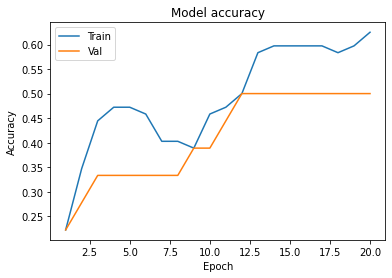

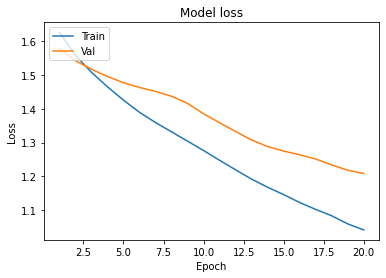

In [49]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
plot_learningCurve(history, epochs)


In [50]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 18ms/step - loss: 1.2116 - accuracy: 0.5652


[1.2115600109100342, 0.5652173757553101]